In [2]:
import pandas as pd

In [3]:
# Reading the CSV File books.csv

books = pd.read_csv("books.csv")

**Q1**: How many rows and columns are there in books.csv dataset?

In [4]:
rows, columns = books.shape
print(f"Rows: {rows}")
print(f"Columns: {columns}")

Rows: 399
Columns: 24


**Q2**: How many books do not have an original title?

In [5]:
books_without_original_title = books[books['original_title'].isnull()]
print(f"Number of books without original title: {len(books_without_original_title)}")

Number of books without original title: 36


**Q3**: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [6]:
cleaned_books = books.dropna(subset=["original_title"])
num_unique = cleaned_books['book_id'].nunique()
print(f"Number of unique books: {num_unique}")

Number of unique books: 363


**Q4**: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [7]:
average_rating = books['average_rating'].mean()
print(f"Average Rating of all books: {average_rating}")

Average Rating of all books: 3.9837844611528817


**Q5**: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [8]:
books_in_2000 = books[books['original_publication_year'] == 2000]
print(f"Number of books published in the year 2000: {len(books_in_2000)}")

Number of books published in the year 2000: 8


**Q6**: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [12]:
max_ratings_book = books[books['work_ratings_count'] == books['work_ratings_count'].max()]['title'][0]
print(f"Book with the maximum number of ratings is: {max_ratings_book}")

Book with the maximum number of ratings is: The Diary of a Young Girl


**Q7**: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

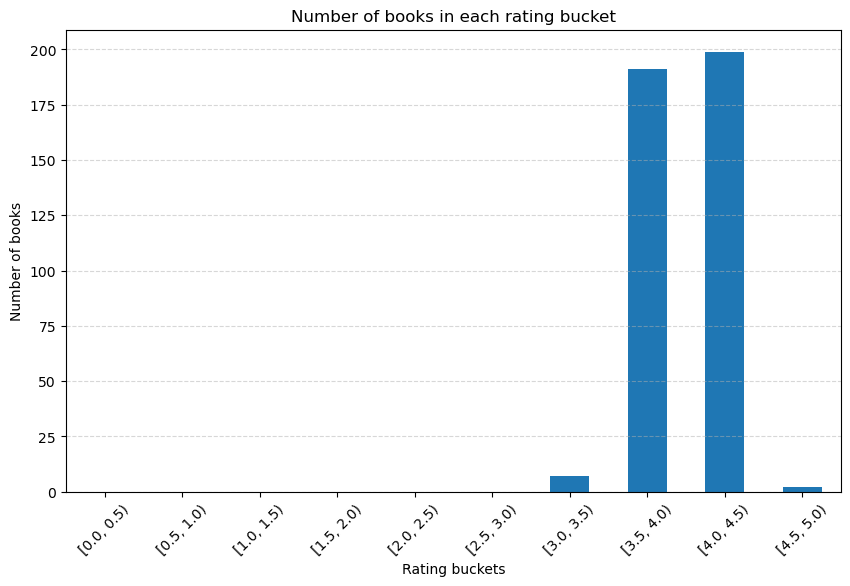

In [17]:
#Importing matplotlib for plotting the graph
import matplotlib.pyplot as plt

bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Adding a rating bucket column
books['rating_bucket'] = pd.cut(books['average_rating'], bins=bins, right=False)

books_in_bucket = books['rating_bucket'].value_counts().sort_index()

plt.figure(figsize = (10, 6))
books_in_bucket.plot(kind='bar')
plt.title("Number of books in each rating bucket")
plt.xlabel("Rating buckets")
plt.ylabel("Number of books")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()